In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [208]:
test_df = pd.read_csv('test_df.csv')

In [209]:
test_df.head(10)

,Date,Team,Name,DK_Pts,Pred_DK_Pts
0,2021-06-06,TEX,Joey Gallo,6,6.462012
1,2021-05-25,TEX,Jose Trevino,0,6.539774
2,2021-05-21,NYM,Johneshwy Fargas,15,5.909397
3,2021-07-20,ARI,Josh Rojas,9,7.630152
4,2021-06-02,MIN,Nick Gordon,5,6.473986
5,2021-08-17,PHI,Didi Gregorius,3,6.003895
6,2021-08-29,CLE,Amed Rosario,5,7.407429
7,2021-08-17,SEA,Jake Fraley,0,7.391698
8,2021-05-29,SFG,Buster Posey,9,9.387235
9,2021-06-18,DET,Eric Haase,0,6.989795


In [210]:
len(test_df)

1381

In [211]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1381 non-null   object 
 1   Team         1381 non-null   object 
 2   Name         1381 non-null   object 
 3   DK_Pts       1381 non-null   int64  
 4   Pred_DK_Pts  1381 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 54.1+ KB


In [212]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [213]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1381 non-null   datetime64[ns]
 1   Team         1381 non-null   object        
 2   Name         1381 non-null   object        
 3   DK_Pts       1381 non-null   int64         
 4   Pred_DK_Pts  1381 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 54.1+ KB


In [214]:
test_df =test_df.set_index(['Date', 'Team', 'Name'])

In [215]:
test_df.head()

,,,DK_Pts,Pred_DK_Pts
Date,Team,Name,,
2021-06-06,TEX,Joey Gallo,6,6.462012
2021-05-25,TEX,Jose Trevino,0,6.539774
2021-05-21,NYM,Johneshwy Fargas,15,5.909397
2021-07-20,ARI,Josh Rojas,9,7.630152
2021-06-02,MIN,Nick Gordon,5,6.473986


In [216]:
test_df.sort_index(level=0, inplace = True)

In [217]:
test_df.head(10)

DK_Pts  Pred_DK_Pts
Date       Team Name                                
2021-05-01 ARI  Eduardo Escobar       0     8.798412
                Josh Rojas           24     7.184348
           BAL  Freddy Galvis         5     7.040551
                Pedro Severino        3     6.964675
           BOS  Alex Verdugo          7     9.691764
                Xander Bogaerts      17     8.535526
           CHC  Ian Happ              8     6.790861
                Javier Baez          10     7.452722
           CHW  Jose Abreu            6     8.992029
           CIN  Mike Moustakas        4     6.046857

In [218]:
len(test_df)

1381

In [219]:
from collections import Counter
stacks_df = test_df.reset_index()
dates_list = list(stacks_df['Date'].unique())
list_of_stack_dfs = []
for date in dates_list:
    temp_df = stacks_df[stacks_df['Date'] == date]
    teams_list = list(temp_df['Team'])
    count_dict = Counter(teams_list)
    for key, value in count_dict.items():
        if value < 2:
            temp_df = temp_df[temp_df.Team != key]
    list_of_stack_dfs.append(temp_df)
stacks_df=pd.concat(list_of_stack_dfs, ignore_index = True)

In [220]:
stacks_df.head(50)

,Date,Team,Name,DK_Pts,Pred_DK_Pts
0,2021-05-01,ARI,Eduardo Escobar,0,8.798412
1,2021-05-01,ARI,Josh Rojas,24,7.184348
2,2021-05-01,BAL,Freddy Galvis,5,7.040551
3,2021-05-01,BAL,Pedro Severino,3,6.964675
4,2021-05-01,BOS,Alex Verdugo,7,9.691764
5,2021-05-01,BOS,Xander Bogaerts,17,8.535526
6,2021-05-01,CHC,Ian Happ,8,6.790861
7,2021-05-01,CHC,Javier Baez,10,7.452722
8,2021-05-01,CLE,Andres Gimenez,0,8.043000
9,2021-05-01,CLE,Jose Ramirez,4,8.515690


In [221]:
len(stacks_df)

1171

In [222]:
stack_breaks = [0]
for i in range(0, len(stacks_df) - 1):
    if stacks_df.iloc[i, 1] != stacks_df.iloc[i+1, 1]:
        stack_breaks.append(i + 1)

In [223]:
len(stack_breaks)

441

In [224]:
rows_to_keep = []

In [225]:
for j in range(0, len(stack_breaks) - 1):
    start_index = stack_breaks[j]
    print(start_index)
    end_index = stack_breaks[j+1]
    print(end_index)
    temp_df = stacks_df.iloc[start_index:end_index, :]
    print(f"temp_df length: {len(temp_df)}")
    if len(temp_df) == 2:
        if temp_df['DK_Pts'].sum() >= 28:
            keep_rows = list(range(start_index, end_index))
            rows_to_keep.append(keep_rows)
    temp_df.sort_values(by = 'DK_Pts')
    dk_pts_list = temp_df['DK_Pts'].tolist()
    if (len(temp_df) > 2) and (sum(dk_pts_list[:2]) >= 28):
        keep_rows = list(range(start_index, end_index))
        rows_to_keep.append(keep_rows)

0
2
temp_df length: 2
2
4
temp_df length: 2
4
6
temp_df length: 2
6
8
temp_df length: 2
8
10
temp_df length: 2
10
12
temp_df length: 2
12
15
temp_df length: 3
15
17
temp_df length: 2
17
19
temp_df length: 2
19
22
temp_df length: 3
22
25
temp_df length: 3
25
28
temp_df length: 3
28
30
temp_df length: 2
30
32
temp_df length: 2
32
34
temp_df length: 2
34
36
temp_df length: 2
36
40
temp_df length: 4
40
42
temp_df length: 2
42
45
temp_df length: 3
45
48
temp_df length: 3
48
51
temp_df length: 3
51
55
temp_df length: 4
55
57
temp_df length: 2
57
59
temp_df length: 2
59
61
temp_df length: 2
61
64
temp_df length: 3
64
66
temp_df length: 2
66
69
temp_df length: 3
69
71
temp_df length: 2
71
74
temp_df length: 3
74
76
temp_df length: 2
76
78
temp_df length: 2
78
80
temp_df length: 2
80
82
temp_df length: 2
82
85
temp_df length: 3
85
88
temp_df length: 3
88
90
temp_df length: 2
90
92
temp_df length: 2
92
96
temp_df length: 4
96
98
temp_df length: 2
98
100
temp_df length: 2
100
103
temp_df length: 

988
990
temp_df length: 2
990
994
temp_df length: 4
994
997
temp_df length: 3
997
1000
temp_df length: 3
1000
1003
temp_df length: 3
1003
1005
temp_df length: 2
1005
1008
temp_df length: 3
1008
1010
temp_df length: 2
1010
1012
temp_df length: 2
1012
1016
temp_df length: 4
1016
1019
temp_df length: 3
1019
1021
temp_df length: 2
1021
1024
temp_df length: 3
1024
1027
temp_df length: 3
1027
1031
temp_df length: 4
1031
1034
temp_df length: 3
1034
1038
temp_df length: 4
1038
1042
temp_df length: 4
1042
1044
temp_df length: 2
1044
1048
temp_df length: 4
1048
1053
temp_df length: 5
1053
1055
temp_df length: 2
1055
1057
temp_df length: 2
1057
1059
temp_df length: 2
1059
1061
temp_df length: 2
1061
1064
temp_df length: 3
1064
1067
temp_df length: 3
1067
1069
temp_df length: 2
1069
1071
temp_df length: 2
1071
1074
temp_df length: 3
1074
1077
temp_df length: 3
1077
1079
temp_df length: 2
1079
1082
temp_df length: 3
1082
1084
temp_df length: 2
1084
1086
temp_df length: 2
1086
1088
temp_df length: 2

In [226]:
rows_to_keep

[[10, 11],
 [34, 35],
 [98, 99],
 [145, 146],
 [156, 157, 158, 159],
 [166, 167, 168],
 [181, 182],
 [183, 184],
 [185, 186],
 [213, 214],
 [316, 317],
 [323, 324, 325],
 [348, 349, 350],
 [353, 354, 355],
 [374, 375, 376],
 [447, 448],
 [469, 470],
 [476, 477],
 [486, 487],
 [505, 506],
 [534, 535],
 [543, 544],
 [580, 581],
 [596, 597, 598],
 [605, 606, 607],
 [611, 612, 613, 614],
 [615, 616],
 [617, 618, 619, 620],
 [632, 633, 634, 635],
 [649, 650, 651],
 [652, 653],
 [658, 659, 660, 661],
 [669, 670, 671],
 [718, 719, 720],
 [730, 731, 732],
 [749, 750],
 [751, 752, 753],
 [775, 776],
 [779, 780, 781],
 [800, 801],
 [807, 808],
 [815, 816],
 [822, 823],
 [837, 838],
 [845, 846, 847],
 [935, 936],
 [953, 954, 955],
 [968, 969],
 [988, 989],
 [994, 995, 996],
 [1042, 1043],
 [1059, 1060],
 [1095, 1096, 1097],
 [1113, 1114, 1115],
 [1139, 1140, 1141],
 [1148, 1149, 1150],
 [1165, 1166, 1167]]

In [227]:
rows_to_keep_flat = [item for sublist in rows_to_keep for item in sublist]

In [228]:
rows_to_keep_flat

[10,
 11,
 34,
 35,
 98,
 99,
 145,
 146,
 156,
 157,
 158,
 159,
 166,
 167,
 168,
 181,
 182,
 183,
 184,
 185,
 186,
 213,
 214,
 316,
 317,
 323,
 324,
 325,
 348,
 349,
 350,
 353,
 354,
 355,
 374,
 375,
 376,
 447,
 448,
 469,
 470,
 476,
 477,
 486,
 487,
 505,
 506,
 534,
 535,
 543,
 544,
 580,
 581,
 596,
 597,
 598,
 605,
 606,
 607,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 632,
 633,
 634,
 635,
 649,
 650,
 651,
 652,
 653,
 658,
 659,
 660,
 661,
 669,
 670,
 671,
 718,
 719,
 720,
 730,
 731,
 732,
 749,
 750,
 751,
 752,
 753,
 775,
 776,
 779,
 780,
 781,
 800,
 801,
 807,
 808,
 815,
 816,
 822,
 823,
 837,
 838,
 845,
 846,
 847,
 935,
 936,
 953,
 954,
 955,
 968,
 969,
 988,
 989,
 994,
 995,
 996,
 1042,
 1043,
 1059,
 1060,
 1095,
 1096,
 1097,
 1113,
 1114,
 1115,
 1139,
 1140,
 1141,
 1148,
 1149,
 1150,
 1165,
 1166,
 1167]

In [229]:
stacks_df = stacks_df.iloc[rows_to_keep_flat, :]

In [230]:
pd.set_option('display.max_rows', None)

In [231]:
stacks_df.reset_index(drop = True, inplace = True)

In [232]:
stacks_df

,Date,Team,Name,DK_Pts,Pred_DK_Pts
0,2021-05-01,COL,Charlie Blackmon,16,11.859218
1,2021-05-01,COL,Ryan McMahon,18,12.430717
2,2021-05-01,WSN,Trea Turner,18,9.676949
3,2021-05-01,WSN,Yadiel Hernandez,12,9.619285
4,2021-05-09,SDP,Fernando Tatis Jr.,21,8.948838
5,2021-05-09,SDP,Victor Caratini,12,7.757002
6,2021-05-13,TBR,Randy Arozarena,24,7.235456
7,2021-05-13,TBR,Yandy Diaz,14,7.205612
8,2021-05-17,CHW,Billy Hamilton,15,9.068971
9,2021-05-17,CHW,Leury Garcia,19,9.482732


In [233]:
stacks_df.describe()

,DK_Pts,Pred_DK_Pts
count,145.000000,145.000000
mean,16.813793,8.423298
std,10.244908,1.738917
min,0.000000,4.750624
25%,9.000000,7.216995
50%,16.000000,8.407644
75%,21.000000,9.593279
max,56.000000,14.013108


(array([ 4., 19., 26., 25., 29., 21., 12.,  6.,  2.,  1.]),
 array([ 4.750624 ,  5.6768724,  6.6031208,  7.5293692,  8.4556176,
         9.381866 , 10.3081144, 11.2343628, 12.1606112, 13.0868596,
        14.013108 ]),
 <BarContainer object of 10 artists>)

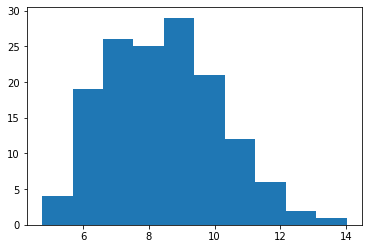

In [234]:
plt.hist(stacks_df['Pred_DK_Pts'])

In [238]:
stacks_df = stacks_df.drop([13, 27, 36, 71, 72, 75, 84, 88, 118, 125, 132, 135])
stacks_df.reset_index(drop = True, inplace = True)

In [239]:
len(stacks_df)

133

In [240]:
stacks_df.head(25)

,Date,Team,Name,DK_Pts,Pred_DK_Pts
0,2021-05-01,COL,Charlie Blackmon,16,11.859218
1,2021-05-01,COL,Ryan McMahon,18,12.430717
2,2021-05-01,WSN,Trea Turner,18,9.676949
3,2021-05-01,WSN,Yadiel Hernandez,12,9.619285
4,2021-05-09,SDP,Fernando Tatis Jr.,21,8.948838
5,2021-05-09,SDP,Victor Caratini,12,7.757002
6,2021-05-13,TBR,Randy Arozarena,24,7.235456
7,2021-05-13,TBR,Yandy Diaz,14,7.205612
8,2021-05-17,CHW,Billy Hamilton,15,9.068971
9,2021-05-17,CHW,Leury Garcia,19,9.482732


In [241]:
stacks_df.describe()

,DK_Pts,Pred_DK_Pts
count,133.000000,133.000000
mean,18.060150,8.505753
std,9.759812,1.732559
min,0.000000,4.750624
25%,12.000000,7.251512
50%,17.000000,8.515456
75%,22.000000,9.619285
max,56.000000,14.013108
